In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("SampleSuperstore.csv")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [36]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [44]:
df.corr()

C:\Users\pavan\AppData\Local\Temp\ipykernel_19292\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [43]:
df.value_counts().unique()

array([2, 1], dtype=int64)

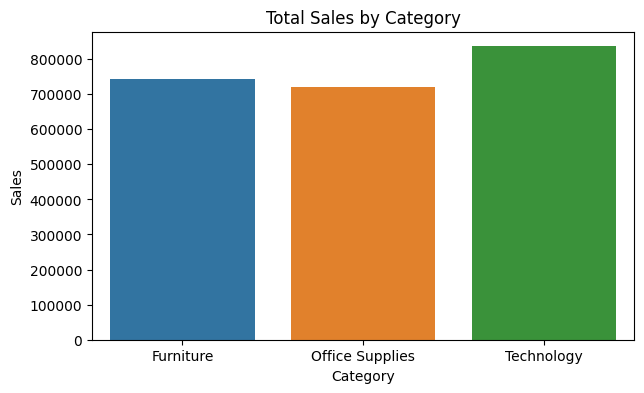

In [49]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

# Visualizationb
plt.figure(figsize=(7, 4))
sns.barplot(data=sales_by_category, x='Category', y='Sales')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Total Sales by Category')
plt.show()


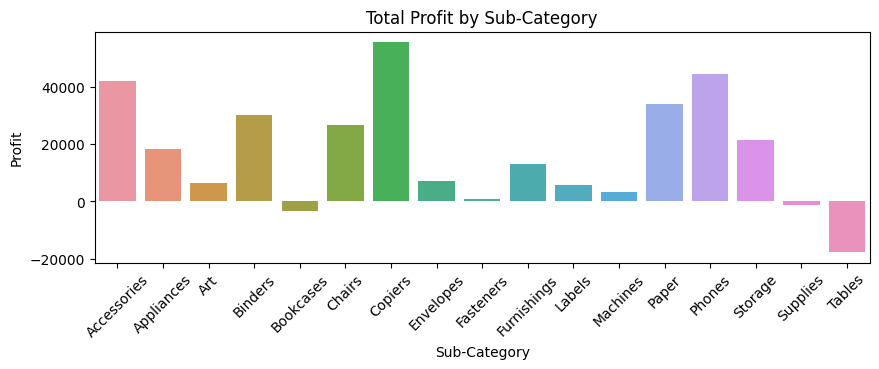

In [51]:
profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum().reset_index()

# Visualization
plt.figure(figsize=(10, 3))
sns.barplot(data=profit_by_subcategory, x='Sub-Category', y='Profit')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.title('Total Profit by Sub-Category')
plt.xticks(rotation=45)
plt.show()


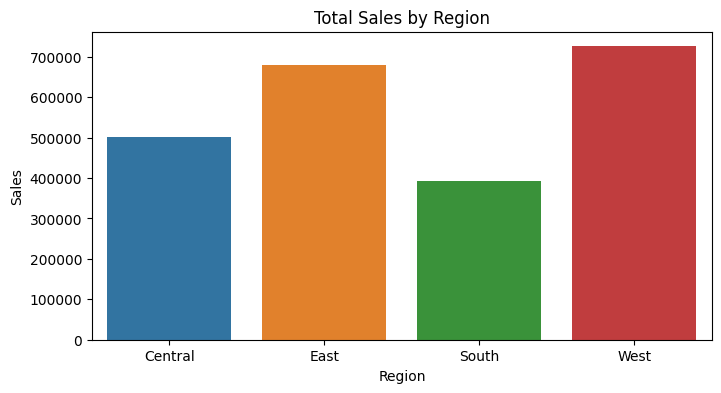

In [52]:
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()

# Visualization
plt.figure(figsize=(8, 4))
sns.barplot(data=sales_by_region, x='Region', y='Sales')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Total Sales by Region')
plt.show()


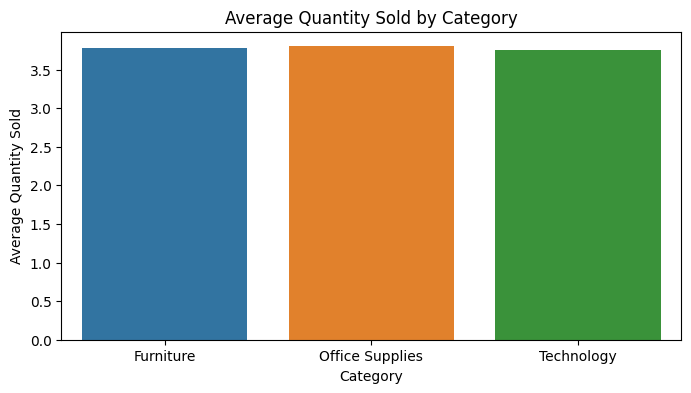

In [53]:
avg_quantity_by_category = df.groupby('Category')['Quantity'].mean().reset_index()

# Visualization
plt.figure(figsize=(8, 4))
sns.barplot(data=avg_quantity_by_category, x='Category', y='Quantity')
plt.xlabel('Category')
plt.ylabel('Average Quantity Sold')
plt.title('Average Quantity Sold by Category')
plt.show()


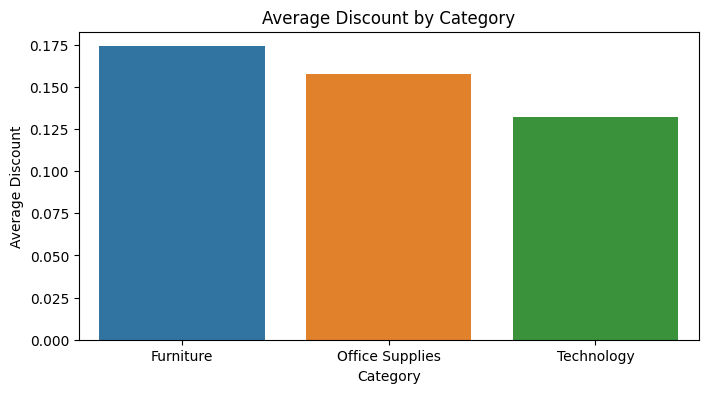

In [54]:
discount_analysis = df.groupby('Category')['Discount'].mean().reset_index()

# Visualization
plt.figure(figsize=(8, 4))
sns.barplot(data=discount_analysis, x='Category', y='Discount')
plt.xlabel('Category')
plt.ylabel('Average Discount')
plt.title('Average Discount by Category')
plt.show()


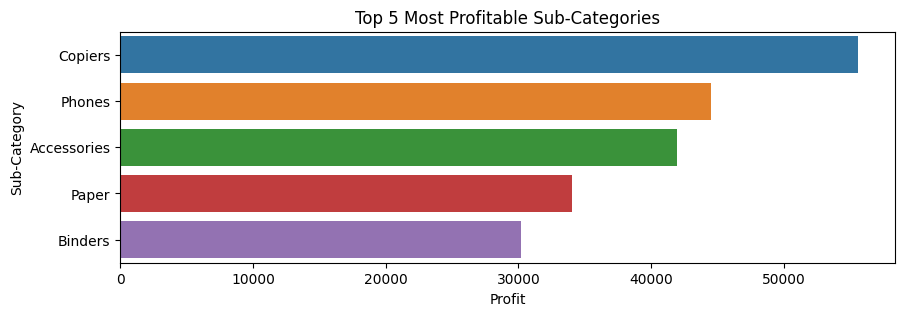

In [55]:
top_5_profitable_subcategories = df.groupby('Sub-Category')['Profit'].sum().nlargest(5)

# Visualization
plt.figure(figsize=(10, 3))
sns.barplot(x=top_5_profitable_subcategories.values, y=top_5_profitable_subcategories.index)
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.title('Top 5 Most Profitable Sub-Categories')
plt.show()


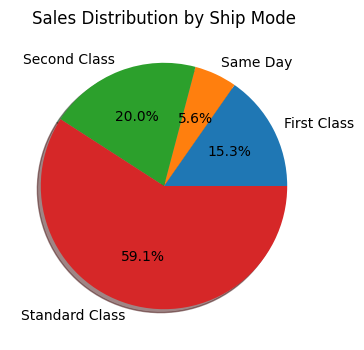

In [57]:
sales_by_ship_mode = df.groupby('Ship Mode')['Sales'].sum().reset_index()

# Visualization
plt.figure(figsize=(8, 4))
plt.pie(sales_by_ship_mode['Sales'], labels=sales_by_ship_mode['Ship Mode'], autopct='%1.1f%%', shadow=True)
plt.title('Sales Distribution by Ship Mode')
plt.show()


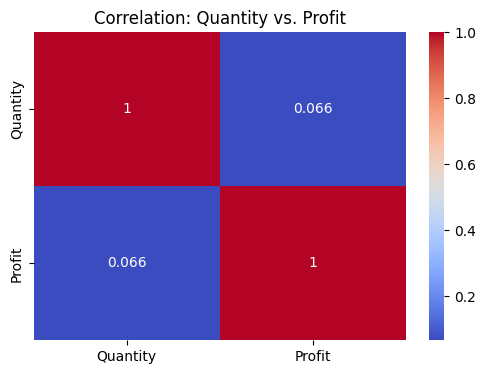

In [27]:
correlation = df[['Quantity', 'Profit']].corr()

# Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation: Quantity vs. Profit')
plt.show()


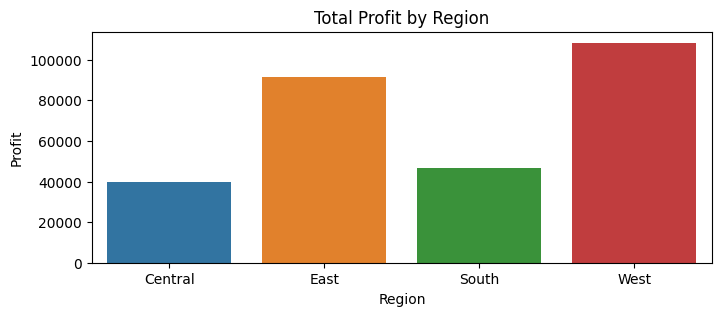

In [58]:
profit_by_region = df.groupby('Region')['Profit'].sum().reset_index()

# Visualization
plt.figure(figsize=(8, 3))
sns.barplot(data=profit_by_region, x='Region', y='Profit')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.title('Total Profit by Region')
plt.show()


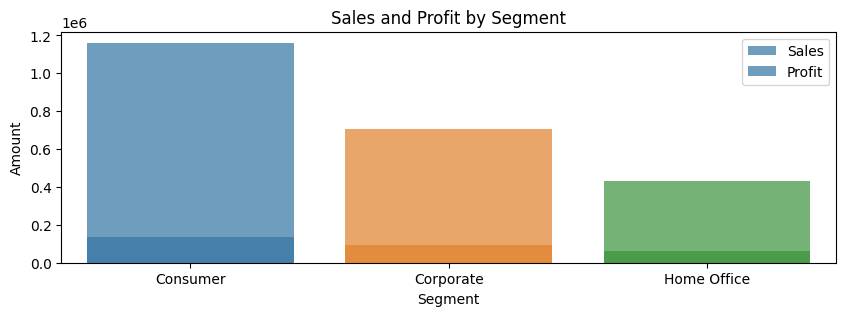

In [59]:
sales_profit_by_segment = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

# Visualization
plt.figure(figsize=(10, 3))
sns.barplot(data=sales_profit_by_segment, x='Segment', y='Sales', label='Sales', alpha=0.7)
sns.barplot(data=sales_profit_by_segment, x='Segment', y='Profit', label='Profit', alpha=0.7)
plt.xlabel('Segment')
plt.ylabel('Amount')
plt.title('Sales and Profit by Segment')
plt.legend()
plt.show()


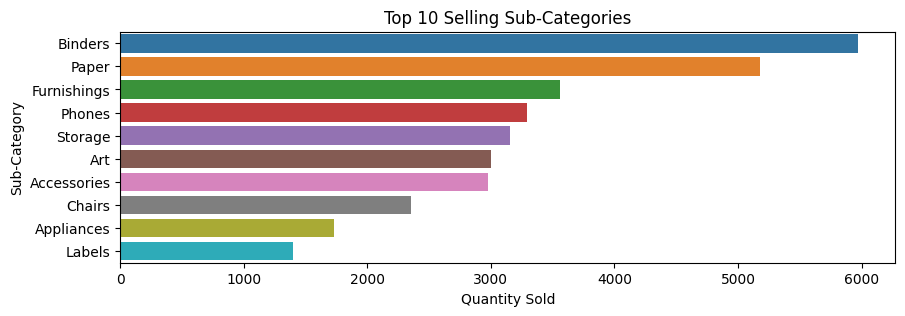

In [60]:
# Calculate total quantity sold by sub-category
quantity_by_subcategory = df.groupby('Sub-Category')['Quantity'].sum().reset_index()

# Sort sub-categories by quantity sold in descending order to get the top-selling sub-category first
top_selling_subcategories = quantity_by_subcategory.nlargest(10, 'Quantity')

# Visualization - Bar chart
plt.figure(figsize=(10, 3))
sns.barplot(data=top_selling_subcategories, x='Quantity', y='Sub-Category')
plt.xlabel('Quantity Sold')
plt.ylabel('Sub-Category')
plt.title('Top 10 Selling Sub-Categories')
plt.show()